# Exploratory Data Analysis (EDA)

## Dataset: Student Course Completion Prediction
This notebook performs a comprehensive EDA to understand the data, identify patterns, and prepare for modeling.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Configuration
sns.set_style("whitegrid")
pd.set_option('display.max_columns', None)

## 1. Data Loading and Overview

In [2]:
file_path = "../data/raw/Course_Completion_Prediction.csv"
df = pd.read_csv(file_path)

print(f"Dataset Shape: {df.shape}")
df.head()

Dataset Shape: (100000, 40)


,Student_ID,Name,Gender,Age,Education_Level,Employment_Status,City,Device_Type,Internet_Connection_Quality,Course_ID,Course_Name,Category,Course_Level,Course_Duration_Days,Instructor_Rating,Login_Frequency,Average_Session_Duration_Min,Video_Completion_Rate,Discussion_Participation,Time_Spent_Hours,Days_Since_Last_Login,Notifications_Checked,Peer_Interaction_Score,Assignments_Submitted,Assignments_Missed,Quiz_Attempts,Quiz_Score_Avg,Project_Grade,Progress_Percentage,Rewatch_Count,Enrollment_Date,Payment_Mode,Fee_Paid,Discount_Used,Payment_Amount,App_Usage_Percentage,Reminder_Emails_Clicked,Support_Tickets_Raised,Satisfaction_Rating,Completed
0,STU100000,Vihaan Patel,Male,19,Diploma,Student,Indore,Laptop,Medium,C102,Data Analysis with Python,Programming,Intermediate,60,4.7,3,30,55.0,2,0.5,1,6,4.3,8,1,5,80.9,71.2,70.8,0,01-06-2024,Scholarship,No,No,1740,49,3,4,3.5,Completed
1,STU100001,Arjun Nair,Female,17,Bachelor,Student,Delhi,Laptop,Low,C106,Machine Learning A-Z,Programming,Advanced,90,4.6,4,37,84.1,2,0.9,3,5,7.8,4,6,3,78.4,42.5,55.6,2,27-04-2025,Credit Card,Yes,No,6147,86,0,0,4.5,Not Completed
2,STU100002,Aditya Bhardwaj,Female,34,Master,Student,Chennai,Mobile,Medium,C101,Python Basics,Programming,Beginner,45,4.6,5,9,75.6,3,0.5,19,5,6.7,8,2,3,100.0,87.9,78.8,2,20-01-2024,NetBanking,Yes,No,4280,85,1,0,5.0,Completed
3,STU100003,Krishna Singh,Female,29,Diploma,Employed,Surat,Mobile,High,C105,UI/UX Design Fundamentals,Design,Beginner,40,4.4,2,27,63.3,1,7.4,19,9,6.4,0,10,4,59.1,51.4,24.7,4,13-05-2025,UPI,Yes,No,3812,42,2,3,3.8,Completed
4,STU100004,Krishna Nair,Female,19,Master,Self-Employed,Lucknow,Laptop,Medium,C106,Machine Learning A-Z,Programming,Advanced,90,4.6,2,36,86.4,1,0.5,4,7,7.5,5,5,8,84.8,93.0,64.9,4,19-12-2024,Debit Card,Yes,Yes,5486,91,3,0,4.0,Completed


### Feature Descriptions

| Feature | Description |
| :--- | :--- |
| Student_ID | Unique identifier for the student. |
| Name | Full name of the student. |
| Gender | Gender of the student (e.g., Male, Female, Others). |
| Age | Age of the student in years. |
| Education_Level | Highest level of education attained by the student. |
| Employment_Status | Current employment status of the student (e.g., Student, Employed). |
| City | City where the student resides. |
| Device_Type | Type of device used to access the course (e.g., Laptop, Mobile). |
| Internet_Connection_Quality | Quality of the student's internet connection (e.g., Low, Medium, High). |
| Course_ID | Unique identifier for the course. |
| Course_Name | Full name of the course. |
| Category | Subject category of the course (e.g., Programming, Design). |
| Course_Level | Difficulty level of the course (e.g., Beginner, Advanced). |
| Course_Duration_Days | Total intended duration of the course in days. |
| Instructor_Rating | Average rating given to the course instructor (e.g., 1.0 to 5.0). |
| Login_Frequency | Number of times the student logs in per a defined period (e.g., per week). |
| Average_Session_Duration_Min | Average time (in minutes) spent per login session. |
| Video_Completion_Rate | Percentage of course video content watched by the student. |
| Discussion_Participation | Count of the student's participation in discussion forums. |
| Time_Spent_Hours | Total number of hours spent actively engaging with the course content. |
| Days_Since_Last_Login | Number of days passed since the student's most recent login. |
| Notifications_Checked | Count of how many times the student checked their notifications. |
| Peer_Interaction_Score | A score representing the quality or quantity of interaction with peers. |
| Assignments_Submitted | Total count of assignments successfully submitted by the student. |
| Assignments_Missed | Total count of assignments missed or not submitted by the student. |
| Quiz_Attempts | Total number of attempts made across all course quizzes. |
| Quiz_Score_Avg | Average score (percentage) across all quizzes taken by the student. |
| Project_Grade | The final grade received on the course project (e.g., 0 to 100). |
| Progress_Percentage | Overall completion progress in the course (0 to 100). |
| Rewatch_Count | Total number of times the student rewatched course video content. |
| Enrollment_Date | Date when the student initially enrolled in the course. |
| Payment_Mode | Method used for course fee payment (e.g., Credit Card, Scholarship). |
| Fee_Paid | Binary indicator: whether the course fee was paid ('Yes'/'No'). |
| Discount_Used | Binary indicator: whether a discount or coupon was applied ('Yes'/'No'). |
| Payment_Amount | The final amount paid by the student for the course. |
| App_Usage_Percentage | Percentage of course activity conducted via the mobile application. |
| Reminder_Emails_Clicked | Number of course reminder emails the student clicked open. |
| Support_Tickets_Raised | Total number of support or help tickets raised by the student. |
| Satisfaction_Rating | Overall satisfaction rating given by the student (e.g., 1.0 to 5.0). |
| Completed | Target Variable: Binary indicator if the student completed the course. |

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 40 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Student_ID                    100000 non-null  object 
 1   Name                          100000 non-null  object 
 2   Gender                        100000 non-null  object 
 3   Age                           100000 non-null  int64  
 4   Education_Level               100000 non-null  object 
 5   Employment_Status             100000 non-null  object 
 6   City                          100000 non-null  object 
 7   Device_Type                   100000 non-null  object 
 8   Internet_Connection_Quality   100000 non-null  object 
 9   Course_ID                     100000 non-null  object 
 10  Course_Name                   100000 non-null  object 
 11  Category                      100000 non-null  object 
 12  Course_Level                  100000 non-null

In [4]:
df[["Quiz_Score_Avg", "Project_Grade"]].corr()

,Quiz_Score_Avg,Project_Grade
Quiz_Score_Avg,1.000000,0.094822
Project_Grade,0.094822,1.000000


In [5]:
df.describe()

,Age,Course_Duration_Days,Instructor_Rating,Login_Frequency,Average_Session_Duration_Min,Video_Completion_Rate,Discussion_Participation,Time_Spent_Hours,Days_Since_Last_Login,Notifications_Checked,Peer_Interaction_Score,Assignments_Submitted,Assignments_Missed,Quiz_Attempts,Quiz_Score_Avg,Project_Grade,Progress_Percentage,Rewatch_Count,Payment_Amount,App_Usage_Percentage,Reminder_Emails_Clicked,Support_Tickets_Raised,Satisfaction_Rating
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,25.709590,51.817300,4.444478,4.785380,33.878180,62.174580,2.329290,3.873632,6.188860,5.232110,6.294509,4.77543,5.123450,3.772330,73.276201,68.189534,53.823104,2.323930,3253.427120,67.859510,2.332650,0.870980,4.132128
std,5.615292,20.324801,0.202631,1.848289,10.341964,19.558126,1.591365,3.781185,6.982047,2.401486,1.977552,1.66464,1.692808,2.021276,12.552344,15.312036,12.495622,1.580735,2084.391775,19.138354,1.584626,0.951569,0.700895
min,17.000000,25.000000,4.100000,0.000000,5.000000,5.000000,0.000000,0.500000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,19.600000,0.000000,7.600000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,21.000000,30.000000,4.300000,3.000000,27.000000,48.500000,1.000000,0.500000,1.000000,4.000000,4.900000,4.00000,4.000000,2.000000,64.700000,57.700000,45.400000,1.000000,1242.000000,55.000000,1.000000,0.000000,3.700000
50%,25.000000,45.000000,4.500000,5.000000,34.000000,64.000000,2.000000,2.700000,4.000000,5.000000,6.300000,5.00000,5.000000,4.000000,73.300000,68.300000,53.900000,2.000000,3715.000000,68.000000,2.000000,1.000000,4.200000
75%,30.000000,60.000000,4.600000,6.000000,41.000000,77.500000,3.000000,6.200000,9.000000,7.000000,7.700000,6.00000,6.000000,5.000000,82.000000,78.800000,62.400000,3.000000,4685.000000,82.000000,3.000000,1.000000,4.700000
max,52.000000,90.000000,4.700000,15.000000,81.000000,99.900000,12.000000,25.600000,99.000000,18.000000,10.000000,10.00000,10.000000,16.000000,100.000000,100.000000,98.600000,15.000000,7149.000000,100.000000,13.000000,8.000000,5.000000


## 2. Data Cleaning & Preprocessing
*   Check for missing values
*   Check for duplicates
*   Convert dates
*   Drop irrelevant columns

In [6]:
df.isnull().sum()

Student_ID                      0
Name                            0
Gender                          0
Age                             0
Education_Level                 0
Employment_Status               0
City                            0
Device_Type                     0
Internet_Connection_Quality     0
Course_ID                       0
Course_Name                     0
Category                        0
Course_Level                    0
Course_Duration_Days            0
Instructor_Rating               0
Login_Frequency                 0
Average_Session_Duration_Min    0
Video_Completion_Rate           0
Discussion_Participation        0
Time_Spent_Hours                0
Days_Since_Last_Login           0
Notifications_Checked           0
Peer_Interaction_Score          0
Assignments_Submitted           0
Assignments_Missed              0
Quiz_Attempts                   0
Quiz_Score_Avg                  0
Project_Grade                   0
Progress_Percentage             0
Rewatch_Count 

> Aucune valeur nulle

In [7]:
# Duplicates
duplicates = df.duplicated().sum()
print(f"\nDuplicate Rows: {duplicates}")


Duplicate Rows: 0


> Aucune ligne dupliquée

### Split des deux datasets (Classification et Regression)

In [12]:
# DF REGRESSION
df_regression = df["Category"].drop(columns=["Course_ID", "Student_ID", "Category", "Name", "Enrollment_Date", "Quiz_Attempts", "Completed"], inplace=True)
df.head()

,Student_ID,Name,Gender,Age,Education_Level,Employment_Status,City,Device_Type,Internet_Connection_Quality,Course_ID,Course_Name,Category,Course_Level,Course_Duration_Days,Instructor_Rating,Login_Frequency,Average_Session_Duration_Min,Video_Completion_Rate,Discussion_Participation,Time_Spent_Hours,Days_Since_Last_Login,Notifications_Checked,Peer_Interaction_Score,Assignments_Submitted,Assignments_Missed,Quiz_Attempts,Quiz_Score_Avg,Project_Grade,Progress_Percentage,Rewatch_Count,Enrollment_Date,Payment_Mode,Fee_Paid,Discount_Used,Payment_Amount,App_Usage_Percentage,Reminder_Emails_Clicked,Support_Tickets_Raised,Satisfaction_Rating,Completed
0,STU100000,Vihaan Patel,Male,19,Diploma,Student,Indore,Laptop,Medium,C102,Data Analysis with Python,Programming,Intermediate,60,4.7,3,30,55.0,2,0.5,1,6,4.3,8,1,5,80.9,71.2,70.8,0,01-06-2024,Scholarship,No,No,1740,49,3,4,3.5,Completed
1,STU100001,Arjun Nair,Female,17,Bachelor,Student,Delhi,Laptop,Low,C106,Machine Learning A-Z,Programming,Advanced,90,4.6,4,37,84.1,2,0.9,3,5,7.8,4,6,3,78.4,42.5,55.6,2,27-04-2025,Credit Card,Yes,No,6147,86,0,0,4.5,Not Completed
2,STU100002,Aditya Bhardwaj,Female,34,Master,Student,Chennai,Mobile,Medium,C101,Python Basics,Programming,Beginner,45,4.6,5,9,75.6,3,0.5,19,5,6.7,8,2,3,100.0,87.9,78.8,2,20-01-2024,NetBanking,Yes,No,4280,85,1,0,5.0,Completed
3,STU100003,Krishna Singh,Female,29,Diploma,Employed,Surat,Mobile,High,C105,UI/UX Design Fundamentals,Design,Beginner,40,4.4,2,27,63.3,1,7.4,19,9,6.4,0,10,4,59.1,51.4,24.7,4,13-05-2025,UPI,Yes,No,3812,42,2,3,3.8,Completed
4,STU100004,Krishna Nair,Female,19,Master,Self-Employed,Lucknow,Laptop,Medium,C106,Machine Learning A-Z,Programming,Advanced,90,4.6,2,36,86.4,1,0.5,4,7,7.5,5,5,8,84.8,93.0,64.9,4,19-12-2024,Debit Card,Yes,Yes,5486,91,3,0,4.0,Completed


In [14]:
# DF CLASIFICATION
df_clasification = df["Category"].drop(columns=["Course_ID", "Student_ID", "Category", "Name", "Enrollment_Date", "Quiz_Score_Avg", "Project_Grade"], inplace=True)
df.head()

,Student_ID,Name,Gender,Age,Education_Level,Employment_Status,City,Device_Type,Internet_Connection_Quality,Course_ID,Course_Name,Category,Course_Level,Course_Duration_Days,Instructor_Rating,Login_Frequency,Average_Session_Duration_Min,Video_Completion_Rate,Discussion_Participation,Time_Spent_Hours,Days_Since_Last_Login,Notifications_Checked,Peer_Interaction_Score,Assignments_Submitted,Assignments_Missed,Quiz_Attempts,Quiz_Score_Avg,Project_Grade,Progress_Percentage,Rewatch_Count,Enrollment_Date,Payment_Mode,Fee_Paid,Discount_Used,Payment_Amount,App_Usage_Percentage,Reminder_Emails_Clicked,Support_Tickets_Raised,Satisfaction_Rating,Completed
0,STU100000,Vihaan Patel,Male,19,Diploma,Student,Indore,Laptop,Medium,C102,Data Analysis with Python,Programming,Intermediate,60,4.7,3,30,55.0,2,0.5,1,6,4.3,8,1,5,80.9,71.2,70.8,0,01-06-2024,Scholarship,No,No,1740,49,3,4,3.5,Completed
1,STU100001,Arjun Nair,Female,17,Bachelor,Student,Delhi,Laptop,Low,C106,Machine Learning A-Z,Programming,Advanced,90,4.6,4,37,84.1,2,0.9,3,5,7.8,4,6,3,78.4,42.5,55.6,2,27-04-2025,Credit Card,Yes,No,6147,86,0,0,4.5,Not Completed
2,STU100002,Aditya Bhardwaj,Female,34,Master,Student,Chennai,Mobile,Medium,C101,Python Basics,Programming,Beginner,45,4.6,5,9,75.6,3,0.5,19,5,6.7,8,2,3,100.0,87.9,78.8,2,20-01-2024,NetBanking,Yes,No,4280,85,1,0,5.0,Completed
3,STU100003,Krishna Singh,Female,29,Diploma,Employed,Surat,Mobile,High,C105,UI/UX Design Fundamentals,Design,Beginner,40,4.4,2,27,63.3,1,7.4,19,9,6.4,0,10,4,59.1,51.4,24.7,4,13-05-2025,UPI,Yes,No,3812,42,2,3,3.8,Completed
4,STU100004,Krishna Nair,Female,19,Master,Self-Employed,Lucknow,Laptop,Medium,C106,Machine Learning A-Z,Programming,Advanced,90,4.6,2,36,86.4,1,0.5,4,7,7.5,5,5,8,84.8,93.0,64.9,4,19-12-2024,Debit Card,Yes,Yes,5486,91,3,0,4.0,Completed


## 3. Univariate Analysis

### 3.2 Numerical Features

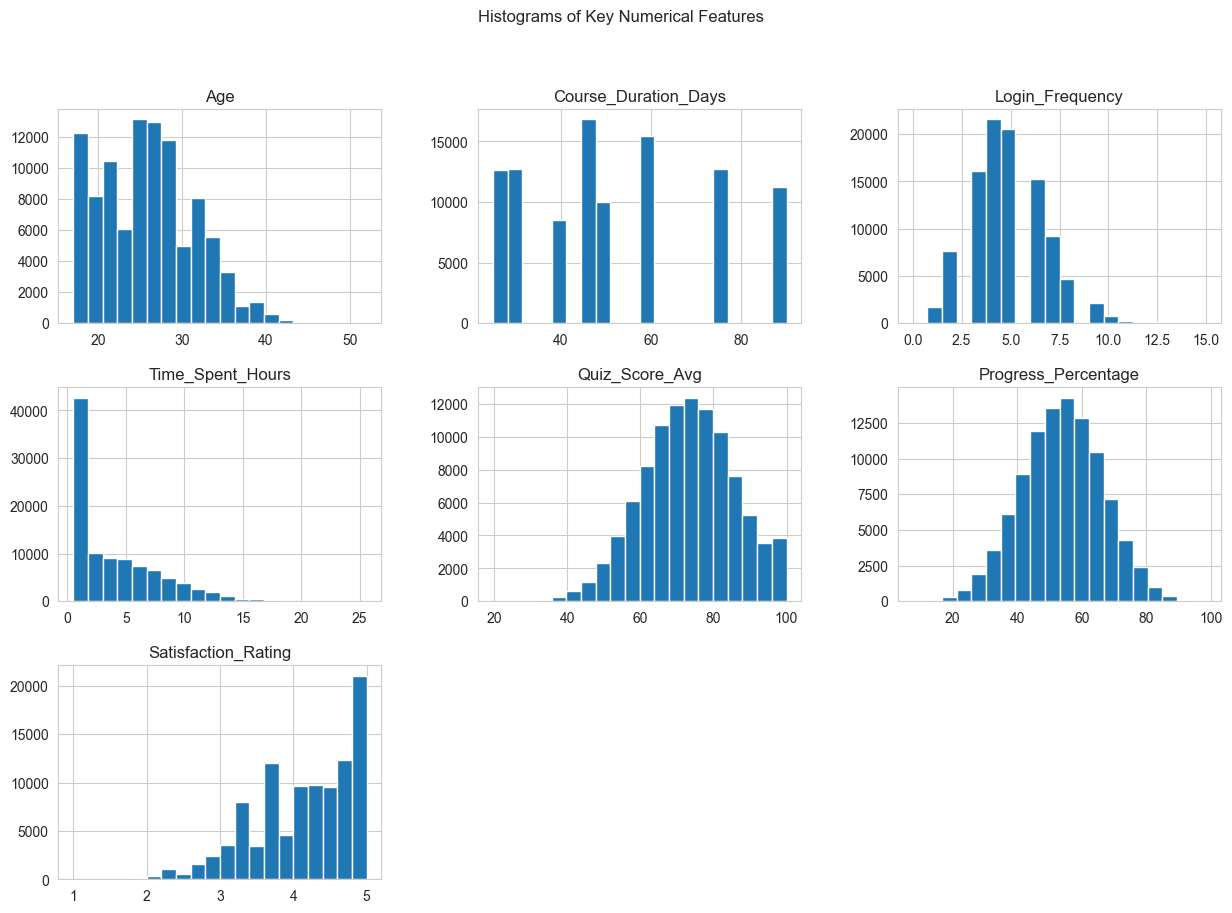

In [10]:
numerical_cols = ['Age', 'Course_Duration_Days', 'Login_Frequency', 'Time_Spent_Hours', 
                  'Quiz_Score_Avg', 'Progress_Percentage', 'Satisfaction_Rating']

df[numerical_cols].hist(bins=20, figsize=(15, 10), layout=(3, 3))
plt.suptitle('Histograms of Key Numerical Features')
plt.show()

### 3.3 Categorical Features

NameError: name 'df_clean' is not defined

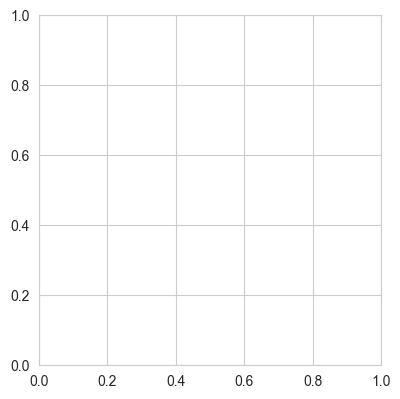

In [ ]:
categorical_cols = ['Gender', 'Education_Level', 'Employment_Status', 'Device_Type', 'Course_Level']

plt.figure(figsize=(15, 10))
for i, col in enumerate(categorical_cols, 1):
    plt.subplot(2, 3, i)
    sns.countplot(x=col, data=df_clasification, palette='pastel')
    plt.title(f'Distribution of {col}')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## 4. Bivariate Analysis (Relation to Target)

### 4.1 Numerical Features vs Target

In [ ]:
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(x='Completed', y=col, data=df_clean, palette='Set2')
    plt.title(f'{col} by Completion Status')
plt.tight_layout()
plt.show()

### 4.2 Categorical Features vs Target

In [ ]:
def plot_completion_rate(col):
    plt.figure(figsize=(8, 5))
    prop_df = df_clean.groupby([col])['Completed'].value_counts(normalize=True).unstack()
    prop_df.plot(kind='bar', stacked=True, color=['#ff9999','#66b3ff'])
    plt.title(f'Completion Rate by {col}')
    plt.ylabel('Proportion')
    plt.legend(title='Completed', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.show()

plot_completion_rate('Education_Level')
plot_completion_rate('Employment_Status')

## 5. Correlation Analysis

In [ ]:
# Select only numeric columns for correlation
numeric_df = df_clean.select_dtypes(include=[np.number])

plt.figure(figsize=(16, 12))
corr = numeric_df.corr()
sns.heatmap(corr, annot=False, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

# Top correlations with a specific feature (e.g., Progress_Percentage) if relevant
print("Top correlations with Progress_Percentage:")
print(corr['Progress_Percentage'].sort_values(ascending=False).head(10))

## 6. Conclusion
Summary of key observations from the EDA:
*   **Target Balance**: [Observe if the dataset is balanced or imbalanced]
*   **Key Drivers**: [Identify features that seem to separate Completed vs Not Completed well, e.g., Progress, Quiz Scores]
*   **Data Quality**: [Note on missing values or clean data]
*   **Next Steps**: Feature engineering, encoding categorical variables, and model selection.